In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,52.994468,27.015656,9.244088,11.040068,19.730729
1,56.612580,6.877363,9.340409,0.711943,17.239015
2,59.850353,5.789319,7.877668,16.538570,22.415666
3,53.145330,0.574932,10.855676,7.946909,18.017040
4,54.459133,15.760262,7.737776,32.031208,17.769722


<Axes: ylabel='Density'>

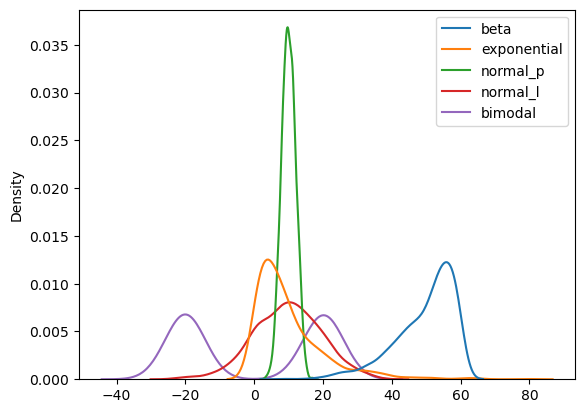

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.724187,10.170573,10.016212,9.759131,0.018363
std,8.615502,10.274945,2.038001,9.794583,20.287295
min,8.399265,0.046836,3.475693,-22.708200,-29.019189
25%,44.970216,3.178480,8.576049,2.888534,-20.109630
50%,52.321743,7.201702,9.971628,9.945364,-0.391234
75%,56.323921,13.457604,11.404562,16.452779,20.116106
max,59.998222,78.998720,16.908007,37.400929,27.726406


<Axes: ylabel='Density'>

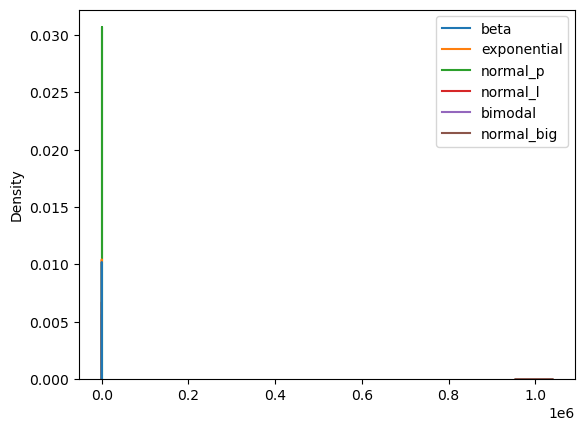

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

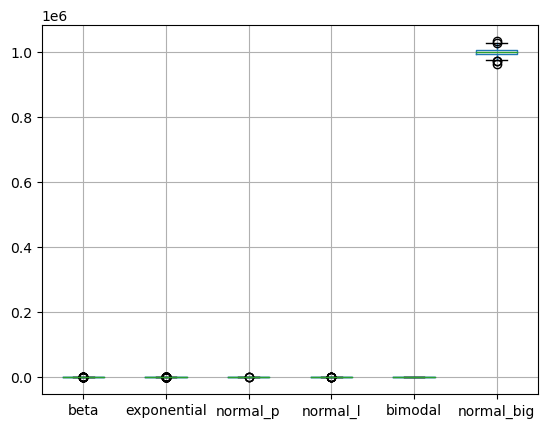

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.059252,1.927592,-0.257217,0.080705,0.500226,1.117826
1,0.377924,-0.031553,-0.223163,-0.680718,0.438283,0.013358
2,0.663097,-0.137403,-0.740304,0.486073,0.566973,0.118621
3,0.072539,-0.644682,0.312548,-0.147333,0.457624,1.819253
4,0.188255,0.832616,-0.789762,1.628240,0.451476,0.312124


<Axes: ylabel='Density'>

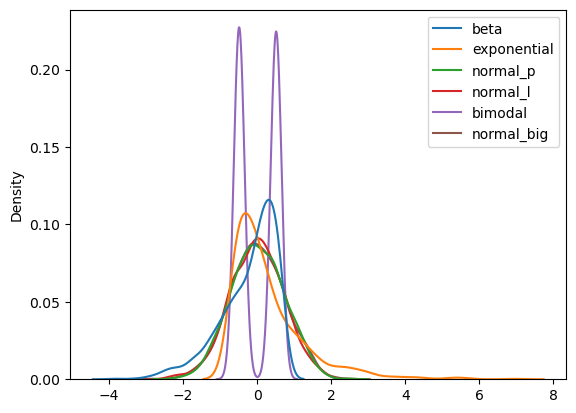

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-2.287849e-01,0.288825,0.015762,-0.013730,0.010182,0.013777
std,7.588274e-01,0.999593,0.720520,0.722088,0.504336,0.733213
min,-3.868559e+00,-0.696058,-2.296590,-2.407326,-0.711683,-2.913665
25%,-6.475003e-01,-0.391397,-0.493397,-0.520252,-0.490194,-0.487432
50%,-3.129007e-16,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.524997e-01,0.608603,0.506603,0.479748,0.509806,0.512568
max,6.761210e-01,6.984741,2.452306,2.024113,0.698996,2.490608
